In [5]:
import pandas as pd

# Load the CSV file to examine its content
file_path = '/Users/rachelwang/Downloads/notes/models/csv/adherence_non_labeled.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,pid,task,adherence,file
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-2,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Word-color-Stroop,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-3,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Free-speech-1,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Prolonged-vowel,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...


In [6]:
# Display unique task names to understand the variations
unique_tasks = data['task'].unique()
unique_tasks

array(['Free-speech-2', 'Word-color-Stroop', 'Free-speech-3',
       'Free-speech-1', 'Prolonged-vowel', 'Diadochokinesis-buttercup',
       'Respiration-and-cough-Breath-1', 'Diadochokinesis-PA',
       'Productive-Vocabulary-1', 'Respiration-and-cough-FiveBreaths-3',
       'Productive-Vocabulary-2', 'Respiration-and-cough-FiveBreaths-2',
       'Audio-Check-4', 'Productive-Vocabulary-6',
       'Random-Item-Generation', 'Audio-Check-1', 'Audio-Check-3',
       'Maximum-phonation-time-3', 'Productive-Vocabulary-5',
       'Respiration-and-cough-ThreeQuickBreaths-1', 'Glides-High-to-Low',
       'Productive-Vocabulary-4', 'Diadochokinesis-KA',
       'Maximum-phonation-time-2', 'Audio-Check-2',
       'Respiration-and-cough-Cough-1', 'Picture-description',
       'Respiration-and-cough-Cough-2', 'Glides-Low-to-High',
       'Story-recall', 'Diadochokinesis-TA',
       'Respiration-and-cough-FiveBreaths-1', 'Diadochokinesis-Pataka',
       'Respiration-and-cough-FiveBreaths-4', 'Maximu

In [7]:
# Mapping the tasks for easier filtering
task_mapping = {
    "Breath Sounds": "Breath-Sounds",
    "Diadochokinesis Tasks: Pa": "Diadochokinesis-PA",
    "Diadochokinesis Tasks: Ta": "Diadochokinesis-TA",
    "Diadochokinesis Tasks: Ka": "Diadochokinesis-KA",
    "Diadochokinesis Tasks: Pataka": "Diadochokinesis-Pataka",
    "Diadochokinesis Tasks: Buttercup": "Diadochokinesis-buttercup",
    "Glides Tasks: High to Low": "Glides-High-to-Low",
    "Glides Tasks: Low to High": "Glides-Low-to-High",
    "Loudness Task": "Loudness",
    "Maximum Phonation Task": "Maximum-phonation-time",
    "Prolonged Vowel Task": "Prolonged-vowel",
    "Respiration and Cough Tasks: Breath": "Respiration-and-cough-Breath",
    "Respiration and Cough Tasks: Cough": "Respiration-and-cough-Cough",
    "Respiration and Cough Tasks: Five Breaths": "Respiration-and-cough-FiveBreaths",
    "Respiration and Cough Tasks: Three Quick Breaths": "Respiration-and-cough-ThreeQuickBreaths",
    "Respiration and Cough Tasks: Voluntary Cough Task": "Voluntary-Cough"
}

# Inverse the mapping for easier filtering
mapped_tasks = task_mapping.values()

# Filter the dataset based on the mapped tasks
filtered_data = data[data['task'].apply(lambda x: any(task in x for task in mapped_tasks))]

filtered_data.head()

,pid,task,adherence,file
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Prolonged-vowel,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
5,1f9475bb-f13b-4f68-969b-28f20455b3e7,Diadochokinesis-buttercup,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
6,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-1,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
7,1f9475bb-f13b-4f68-969b-28f20455b3e7,Diadochokinesis-PA,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...
9,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-3,NaN,/Users/rachelwang/Downloads/bids_with_sensitiv...


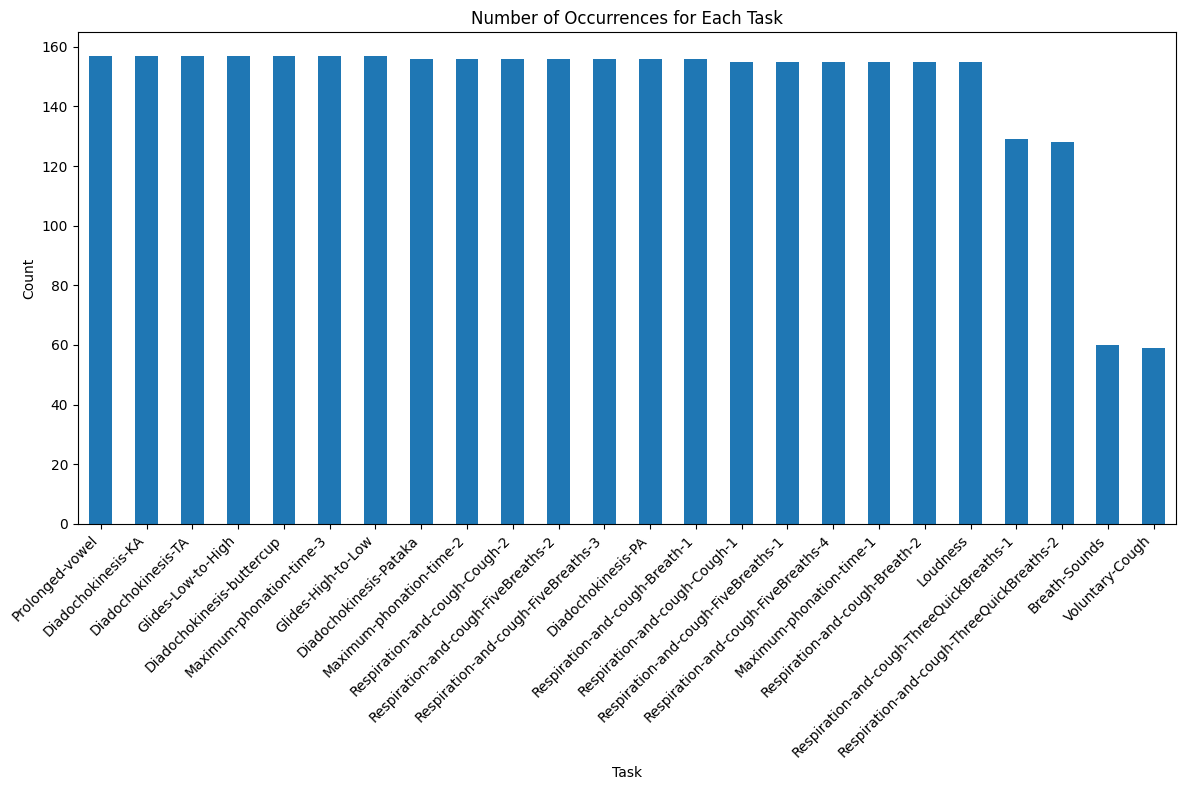

'/Users/rachelwang/Downloads/notes/models/csv/filtered_adherence_data_nonlabeled.csv'

In [8]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each task
task_counts = filtered_data['task'].value_counts()

# Visualize the data using a bar chart
plt.figure(figsize=(12, 8))
task_counts.plot(kind='bar')
plt.title('Number of Occurrences for Each Task')
plt.xlabel('Task')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the filtered data to a new CSV file
output_file_path = '/Users/rachelwang/Downloads/notes/models/csv/filtered_adherence_data_nonlabeled.csv'
filtered_data.to_csv(output_file_path, index=False)

output_file_path

In [9]:
# Show number of occurrences and a summary
task_counts_summary = task_counts.describe()

# Prepare the summary for display
summary = {
    'Total Tasks': task_counts.sum(),
    'Unique Tasks': task_counts_summary['count'],
}

summary_df = pd.DataFrame(summary, index=[0])
summary_df

# Display the summary
print(summary_df)

   Total Tasks  Unique Tasks
0         3497          24.0


In [2]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

# Load the CSV file
csv_path = '/Users/rachelwang/Downloads/notes/models/csv/filtered_adherence_data_nonlabeled.csv'
data = pd.read_csv(csv_path)

# Directory to save spectrogram images
output_dir = '/Users/rachelwang/Downloads/notes/models/adherence_spectrograms_nonlabeled/'
os.makedirs(output_dir, exist_ok=True)


In [3]:
# Function to save spectrogram
def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

In [9]:
# Generate spectrograms for all audio files in the CSV
for idx, row in data.iterrows():
    audio_path = row['file']
    output_path = os.path.join(output_dir, f'spectrogram_{idx}.png')
    save_spectrogram(audio_path, output_path)
    data.at[idx, 'spectrogram'] = output_path

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104d9e5c0>>
Traceback (most recent call last):
  File "/Users/rachelwang/Downloads/notes/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [4]:
# Generate spectrograms starting from index 2901
start_index = 2901
for idx, row in data.iterrows():
    if idx >= start_index:
        audio_path = row['file']
        output_path = os.path.join(output_dir, f'spectrogram_{idx}.png')
        save_spectrogram(audio_path, output_path)
        data.at[idx, 'spectrogram'] = output_path

In [6]:
for idx, row in data.iterrows():
    audio_path = row['file']
    output_path = os.path.join(output_dir, f'spectrogram_{idx}.png')
    data.at[idx, 'spectrogram'] = output_path

In [7]:
# Save the updated CSV with the paths to the spectrogram images
updated_csv_path = '/Users/rachelwang/Downloads/notes/models/csv/adherence_non_labeled_with_image.csv'
data.to_csv(updated_csv_path, index=False)

updated_csv_path

'/Users/rachelwang/Downloads/notes/models/csv/adherence_non_labeled_with_image.csv'

In [25]:
print(f"Type of updated new_data: {type(updated_csv_path)}")

Type of updated new_data: <class 'str'>


In [27]:
import pandas as pd
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

# Define the dataset class
class SpectrogramDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        if isinstance(dataframe, str):
            print(f"Expected DataFrame, got string: {dataframe}")
        self.dataframe = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['spectrogram']
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, 0  # Dummy label

In [56]:
# Define the transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [64]:
# Create a dataset and dataloader for the new data
new_dataset = SpectrogramDataset(data, transform=transform)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

In [65]:
import torch.nn as nn
# Load the saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 classes
model.load_state_dict(torch.load('resnet_best_model_adherence.pth'))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Predict labels for the new data

In [66]:
# Predict labels for the new data
predictions = []

with torch.no_grad():
    for images, _ in new_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Add the predictions to the new data
data['adherence'] = [p + 1 for p in predictions]  # Convert back to 1-based labels

# Save the new data with predictions
new_data_with_predictions_path = '/Users/rachelwang/Downloads/notes/models/csv/predicted_adherence_2.csv' 
data.to_csv(new_data_with_predictions_path, index=False)

print(f"Predictions saved to: {new_data_with_predictions_path}")

Predictions saved to: /Users/rachelwang/Downloads/notes/models/csv/predicted_adherence_2.csv


In [60]:
import pandas as pd

# Load the CSV file with predictions
data = pd.read_csv(new_data_with_predictions_path)

# Count the occurrences of each adherence label
label_counts = data['adherence'].value_counts().sort_index()

# Print the counts for each label
print("Adherence label counts:")
print(label_counts)

Adherence label counts:
adherence
2      61
3       7
4      18
5    3411
Name: count, dtype: int64
